In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=5, suppress=True)

In [2]:
# Rows: observations, Columns: predictors
from data_import_initial_analysis import build_X, column_names
import pandas as pd
FD001 = pd.read_csv('data/train_FD001.txt', sep=r'\s+', header=None, names=column_names)
FD002 = pd.read_csv('data/train_FD002.txt', sep=r'\s+', header=None, names=column_names)
FD003 = pd.read_csv('data/train_FD003.txt', sep=r'\s+', header=None, names=column_names)
FD004 = pd.read_csv('data/train_FD004.txt', sep=r'\s+', header=None, names=column_names)

X1, feature_cols1 = build_X(FD001, drop_constant=True)
X2, feature_cols2 = build_X(FD002, drop_constant=True)
X3, feature_cols3 = build_X(FD003, drop_constant=True)
X4, feature_cols4 = build_X(FD004, drop_constant=True)

In [3]:
def standardize(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0, ddof=1)
    return (X - means) / stds

standardized_X1 = standardize(X1)
standardized_X2 = standardize(X2)
standardized_X3 = standardize(X3)
standardized_X4 = standardize(X4)

covariance_matrix_1 = np.cov(standardized_X1, rowvar=False)
covariance_matrix_2 = np.cov(standardized_X2, rowvar=False)
covariance_matrix_3 = np.cov(standardized_X3, rowvar=False)
covariance_matrix_4 = np.cov(standardized_X4, rowvar=False)


In [4]:
eigenvalues_1, eigenvectors_1 = np.linalg.eigh(covariance_matrix_1)
eigenvalues_1 = eigenvalues_1[::-1]
eigenvectors_1 = eigenvectors_1[:, ::-1]

eigenvalues_2, eigenvectors_2 = np.linalg.eigh(covariance_matrix_2)
eigenvalues_2 = eigenvalues_2[::-1]
eigenvectors_2 = eigenvectors_2[:, ::-1]

eigenvalues_3, eigenvectors_3 = np.linalg.eigh(covariance_matrix_3)
eigenvalues_3 = eigenvalues_3[::-1]
eigenvectors_3 = eigenvectors_3[:, ::-1]

eigenvalues_4, eigenvectors_4 = np.linalg.eigh(covariance_matrix_4)
eigenvalues_4 = eigenvalues_4[::-1]
eigenvectors_4 = eigenvectors_4[:, ::-1]

print("Eigenvalues of FD001:\n", eigenvalues_1)
print("\nEigenvalues of FD002:\n", eigenvalues_2)
print("\nEigenvalues of FD003:\n", eigenvalues_3)
print("\nEigenvalues of FD004:\n", eigenvalues_4)

Eigenvalues of FD001:
 [9.02666 2.09879 1.01233 0.99217 0.96208 0.41375 0.36821 0.34831 0.30603
 0.28977 0.25537 0.20615 0.19593 0.17658 0.1725  0.14612 0.02927]

Eigenvalues of FD002:
 [18.5633   4.79056  0.4578   0.09803  0.04037  0.02303  0.01624  0.00611
  0.00135  0.00112  0.00101  0.00056  0.00019  0.0001   0.00009  0.00007
  0.00005  0.00001  0.       0.       0.       0.       0.      -0.     ]

Eigenvalues of FD003:
 [7.44792 4.74647 1.00473 1.00054 0.92343 0.78135 0.43171 0.33903 0.30651
 0.2493  0.20074 0.16047 0.13775 0.12515 0.06106 0.03695 0.0359  0.01098]

Eigenvalues of FD004:
 [18.56588  4.79109  0.4767   0.07643  0.04084  0.01892  0.01553  0.00713
  0.0032   0.00135  0.00112  0.00101  0.00032  0.00019  0.00011  0.0001
  0.00005  0.00004  0.00001  0.       0.       0.       0.      -0.     ]


0.6544381449008057
0.9730774849445291
0.6774664319350925
0.9732071223405057


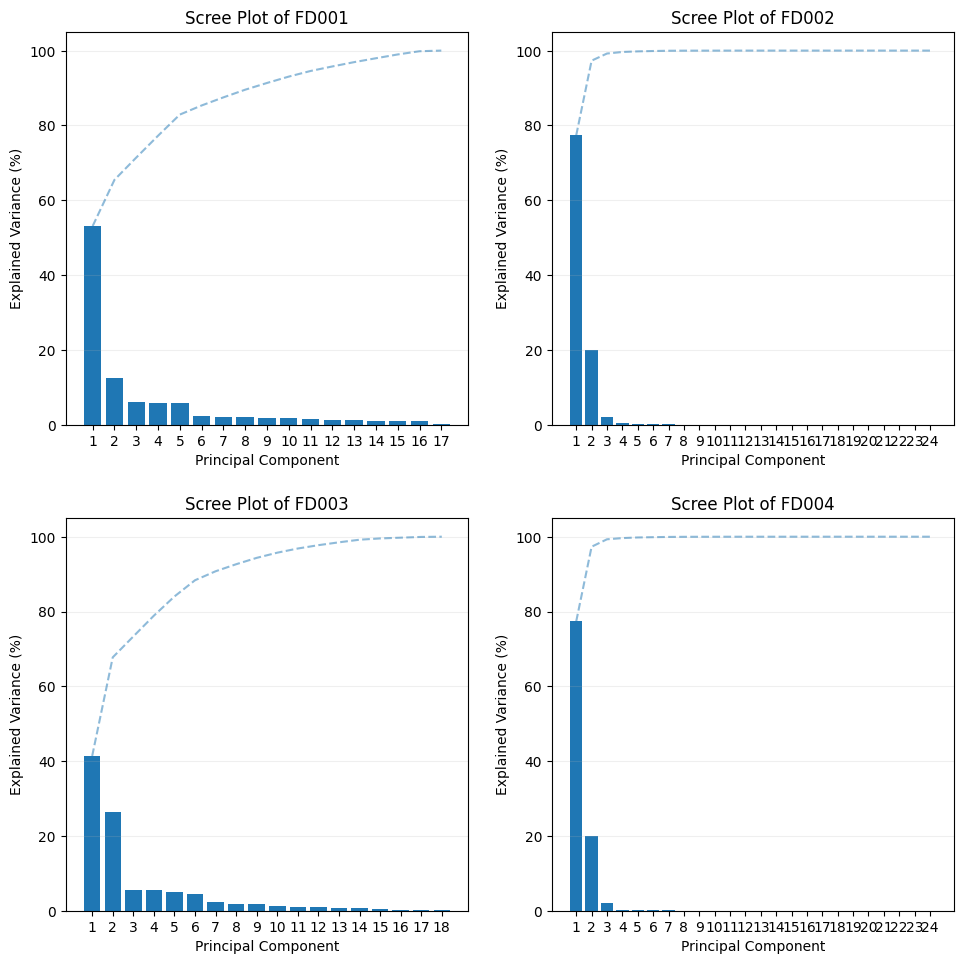

In [8]:
def plot_scree_plots(eigenvalues, ax, i, j, title='Scree Plot'):
    explained_var = eigenvalues / eigenvalues.sum()
    cumulative_var = np.cumsum(explained_var)

    ax[i, j].bar(range(1, len(explained_var)+1), explained_var*100)
    ax[i, j].plot(range(1, len(cumulative_var)+1), cumulative_var*100, alpha=0.5, linestyle='--')
    ax[i, j].set_xlabel('Principal Component')
    ax[i, j].set_ylabel('Explained Variance (%)')
    ax[i, j].set_title(title)
    
    ax[i, j].set_xticks(range(1, len(explained_var)+1))
    ax[i, j].set_xticklabels([str(k) for k in range(1, len(explained_var)+1)])
    ax[i, j].grid(axis='y', alpha=0.2)
    
    print(cumulative_var[1])


fig, ax = plt.subplots(2, 2, figsize=(10, 10))
plot_scree_plots(eigenvalues_1, ax, 0, 0, title='Scree Plot of FD001')
plot_scree_plots(eigenvalues_2, ax, 0, 1, title='Scree Plot of FD002')
plot_scree_plots(eigenvalues_3, ax, 1, 0, title='Scree Plot of FD003')
plot_scree_plots(eigenvalues_4, ax, 1, 1, title='Scree Plot of FD004')



fig.tight_layout(pad=2.0)
plt.show()

C:\Users\anton\AppData\Local\Temp\ipykernel_19788\3379327170.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=2.0)


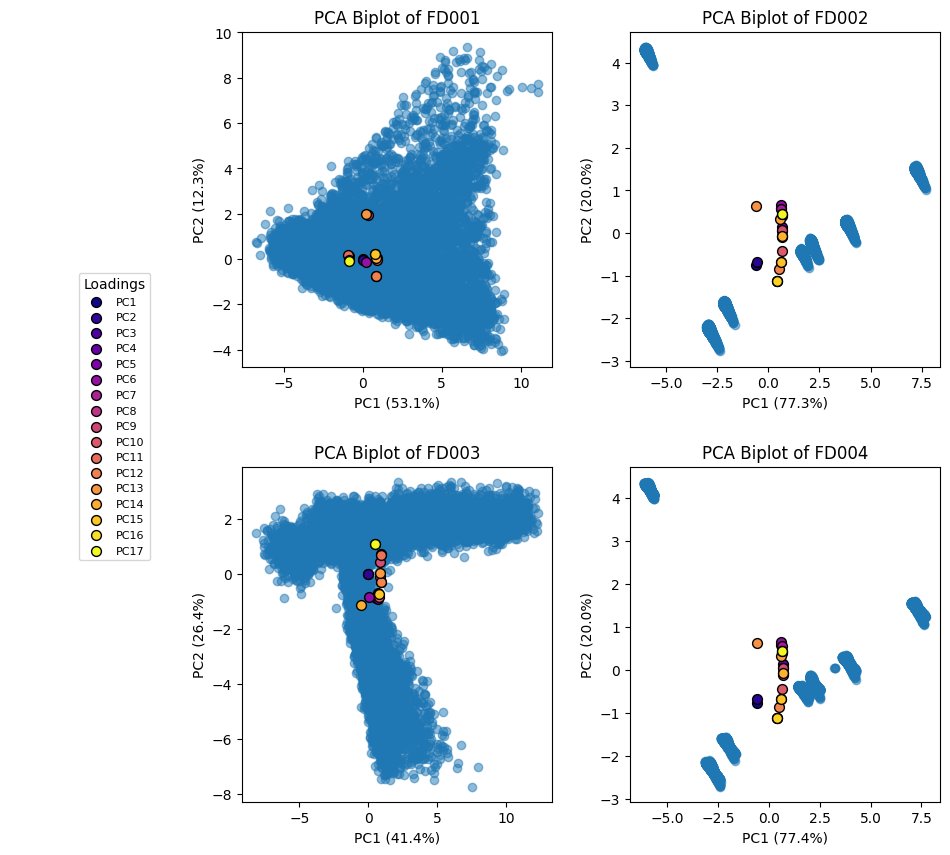

In [9]:
def plot_biplot(standardized_X, eigenvectors, eigenvalues, ax, i, j, title='PCA Biplot with loadings'):
    scores = np.dot(standardized_X, eigenvectors)

    ax[i, j].scatter(scores[:,0], scores[:,1], alpha=0.5)
    n_vars = eigenvectors.shape[0]
    colors = plt.cm.plasma(np.linspace(0, 1, n_vars))

    x = eigenvectors[:,0]*3
    y = eigenvectors[:,1]*3
    # palline colorate per i loadings (label solo nel primo subplot per la legenda)
    for k in range(n_vars):
        ax[i, j].scatter(x[k], y[k], s=50, color=colors[k], edgecolor='black',
                         label=(f'PC{k+1}' if (i == 0 and j == 0) else None))

    ax[i, j].set_xlabel(f"PC1 ({eigenvalues[0]/eigenvalues.sum()*100:.1f}%)")
    ax[i, j].set_ylabel(f"PC2 ({eigenvalues[1]/eigenvalues.sum()*100:.1f}%)")
    ax[i, j].set_title(title)

# Layout: [Legenda | 2x2 biplot]
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(1, 2, width_ratios=[1.2, 4], wspace=0.05)

legend_ax = fig.add_subplot(gs[0, 0])
grid = gs[0, 1].subgridspec(2, 2, wspace=0.25, hspace=0.3)

ax00 = fig.add_subplot(grid[0, 0])
ax01 = fig.add_subplot(grid[0, 1])
ax10 = fig.add_subplot(grid[1, 0])
ax11 = fig.add_subplot(grid[1, 1])
ax_arr = np.array([[ax00, ax01], [ax10, ax11]])

plot_biplot(standardized_X1, eigenvectors_1, eigenvalues_1, ax_arr, 0, 0, title='PCA Biplot of FD001')
plot_biplot(standardized_X2, eigenvectors_2, eigenvalues_2, ax_arr, 0, 1, title='PCA Biplot of FD002')
plot_biplot(standardized_X3, eigenvectors_3, eigenvalues_3, ax_arr, 1, 0, title='PCA Biplot of FD003')
plot_biplot(standardized_X4, eigenvectors_4, eigenvalues_4, ax_arr, 1, 1, title='PCA Biplot of FD004')

# legenda nel pannello di sinistra
handles, labels = ax00.get_legend_handles_labels()
legend_ax.axis('off')
legend_ax.legend(handles, labels, title='Loadings', loc='center', ncol=1, fontsize=8)

fig.tight_layout(pad=2.0)
plt.show()

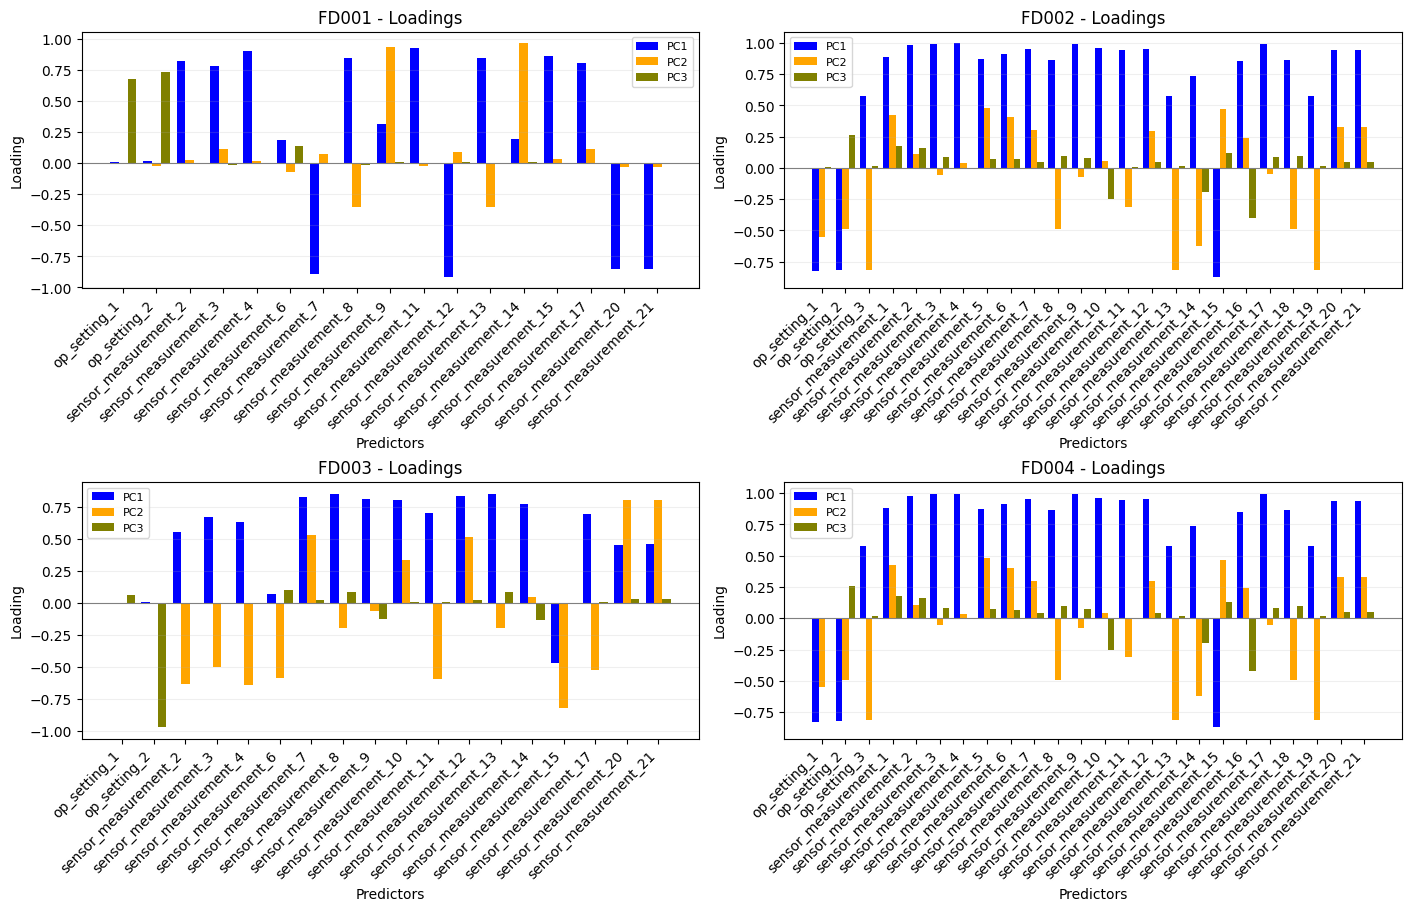

In [10]:
def plot_loadings_bars(eigenvectors, eigenvalues, feature_labels, ax, pcs=(0,1,2), title='PCA Loadings'):
    pcs = [p for p in pcs if p < eigenvectors.shape[1]]
    if not pcs:
        return
    L = np.column_stack([eigenvectors[:, p] * np.sqrt(eigenvalues[p]) for p in pcs])  # correlazioni var–PC
    n, k = L.shape

    if len(feature_labels) != n:
        feature_labels = [f"S{i+1}" for i in range(n)]

    x = np.arange(n)
    width = 0.8 / k
    colors = ['blue', 'orange', 'olive', 'red', 'purple'][:k]

    for i, p in enumerate(pcs):
        ax.bar(x + (i - (k-1)/2)*width, L[:, i], width=width, color=colors[i], label=f'PC{p+1}')

    ax.axhline(0, color='gray', lw=0.8)
    ax.set_xticks(x)
    ax.set_xticklabels(feature_labels, rotation=45, ha='right')
    ax.set_ylabel('Loading')
    ax.set_xlabel('Predictors')
    ax.set_title(title)
    ax.grid(axis='y', alpha=0.2)
    ax.legend(frameon=True, fontsize=8)

fig, axs = plt.subplots(2, 2, figsize=(14, 9), constrained_layout=True)
plot_loadings_bars(eigenvectors_1, eigenvalues_1, feature_cols1, axs[0,0], title='FD001 - Loadings')
plot_loadings_bars(eigenvectors_2, eigenvalues_2, feature_cols2, axs[0,1], title='FD002 - Loadings')
plot_loadings_bars(eigenvectors_3, eigenvalues_3, feature_cols3, axs[1,0], title='FD003 - Loadings')
plot_loadings_bars(eigenvectors_4, eigenvalues_4, feature_cols4, axs[1,1], title='FD004 - Loadings')
plt.show()